**R入門（その11）**

---
**このノートブックについて**<br>
このColabのノートブック「R入門（その11）」では「ggplot2でグラフを作成する方法」を解説します。（追加で矢野がお気に入りのpatchworksとggthemesというパッケージも紹介します。）なお、ggplot2の機能をPythonに移植したplotnineというパッケージもあります。

<br>すでに「[R入門（その1）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_01_basic.ipynb)」と「[R入門（その10）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/%E7%B5%8C%E6%B8%88%E7%B5%B1%E8%A8%88_R%E5%85%A5%E9%96%80_10_pipe.ipynb)」を読んでいることを前提に説明します。未読の人はその2つを先に読んでください。
<br>
> 注：このノートブックは駒澤大学経済学部で開講している「経済統計a/b」で「Excel以外の手法を学ぶ意欲がある履修生向け」に**最低限の知識**だけ解説する**補助資料**です

**参考文献**<br>
https://ggplot2.tidyverse.org/reference/index.html<br>
https://r4ds.had.co.nz/data-visualisation.html<br>
https://r4ds.had.co.nz/graphics-for-communication.html

**Plotnine(Python)は**<br>
https://plotnine.readthedocs.io/en/stable/

**最初に呪文（全オブジェクトの削除）**<br>最初にちょっとした呪文を入れましょう。<br>（補足：以下の呪文rm(list=ls())は既にあるオブジェクトを全部削除するコマンドです。必須ではありませんが、場合によってはトラブルを避けるために役立つことがあります。）


In [1]:
rm(list=ls())

パッケージtidyverseを読み込みます（ggplot2はtidyverseに含まれています）。

In [2]:
require(tidyverse)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ggolot2の発想（かなり適当なイメージ）

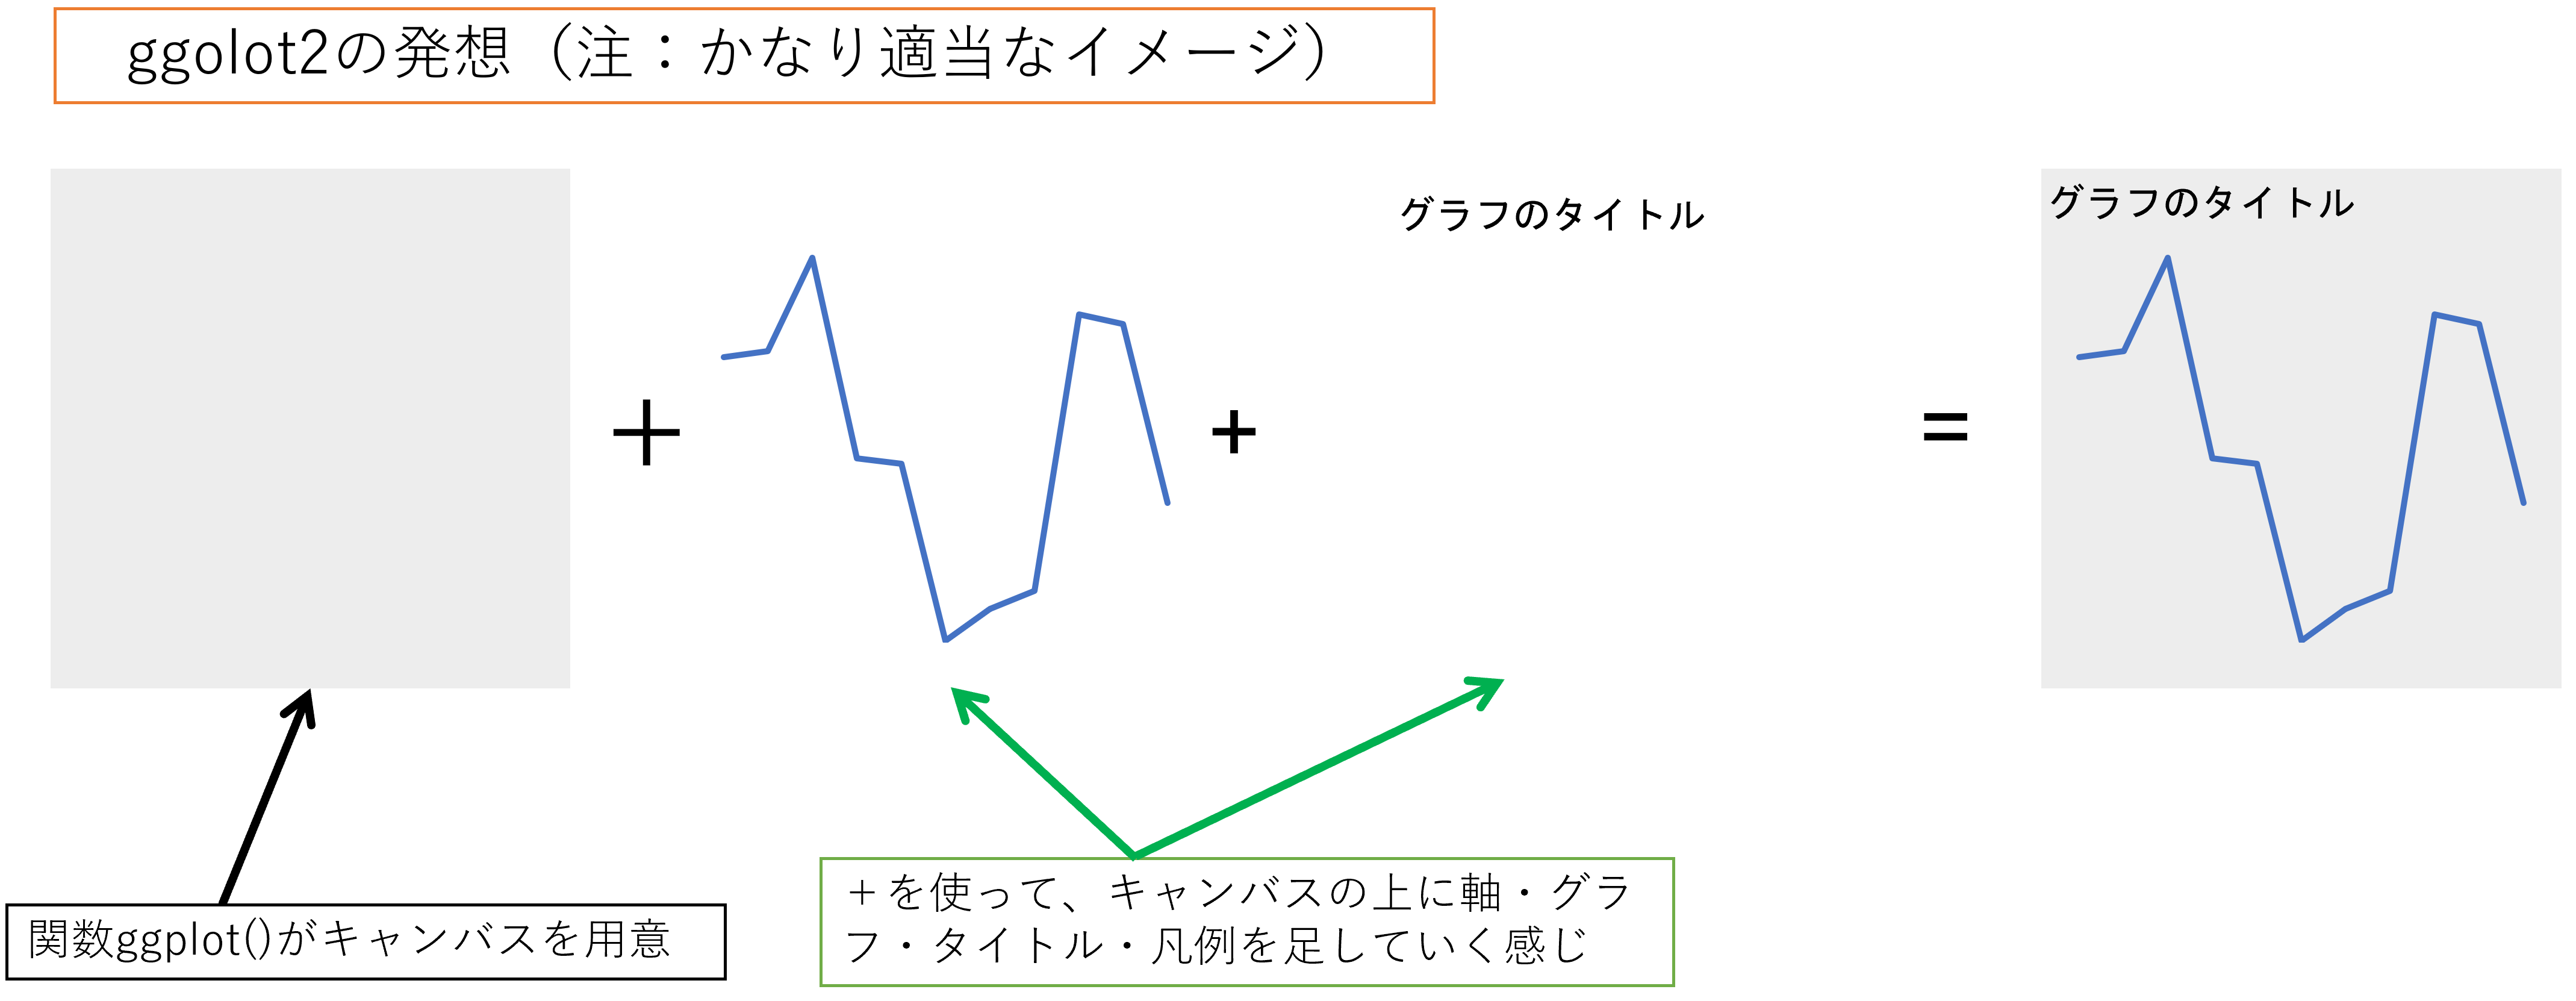

https://ggplot2.tidyverse.org/reference/index.html

Plotの基本

| 関数 |  機能  | 
| ---- | ---- |
|  ggplot()  |  グラフを表示する領域を作成  |
|  aes()  |  x軸（横軸)・y軸（縦軸）等の指定  |


Goemの基本

| TH |  TH  | 
| ---- | ---- |
|  geom_line()  |  TD  |
|  geom_bar()  |  TD  |
|  geom_hist()  |  TD  |
|  geom_point()  |  TD  |
|  aes()  |  TD  |


In [3]:
ice_df <- read.csv("https://www.dropbox.com/s/2ky13qi387j8b05/kion_iceCream.csv?raw=1",header=T)
ice_df |> head()

,年月,気温,アイスクリーム支出金額
,<chr>,<dbl>,<int>
1,2005年4月,15.1,541
2,2005年5月,17.7,666
3,2005年6月,23.2,801
4,2005年7月,25.6,1033
5,2005年8月,28.1,1175
6,2005年9月,24.7,737


これでice_dfという変数にデータが入力されました。このicd_dfにどのようなデータが入っているかを確認してみましょう。View()、head()、tail()などの関数を使います。すでに解説しましたが、head()は上から6行を表示する関数です。


https://fujinitaka.hatenablog.com/entry/2018/07/08/022044


In [4]:
ice_df |> rename(date="年月", temperature="気温", ice_purchase="アイスクリーム支出金額") -> ice_df
ice_df |> mutate(date=gsub(date,pattern="年",replacement = "/", ignore.case = TRUE)) -> ice_df
ice_df |> mutate(date=gsub(date,pattern="月",replacement = "", ignore.case = TRUE)) -> ice_df
ice_df |> head()

,date,temperature,ice_purchase
,<chr>,<dbl>,<int>
1,2005/4,15.1,541
2,2005/5,17.7,666
3,2005/6,23.2,801
4,2005/7,25.6,1033
5,2005/8,28.1,1175
6,2005/9,24.7,737


**ggplot()でキャンバスを作る**

まず、関数gglot()を使って、「グラフを表示する領域（通称キャンバス）」を作ってみましょう。


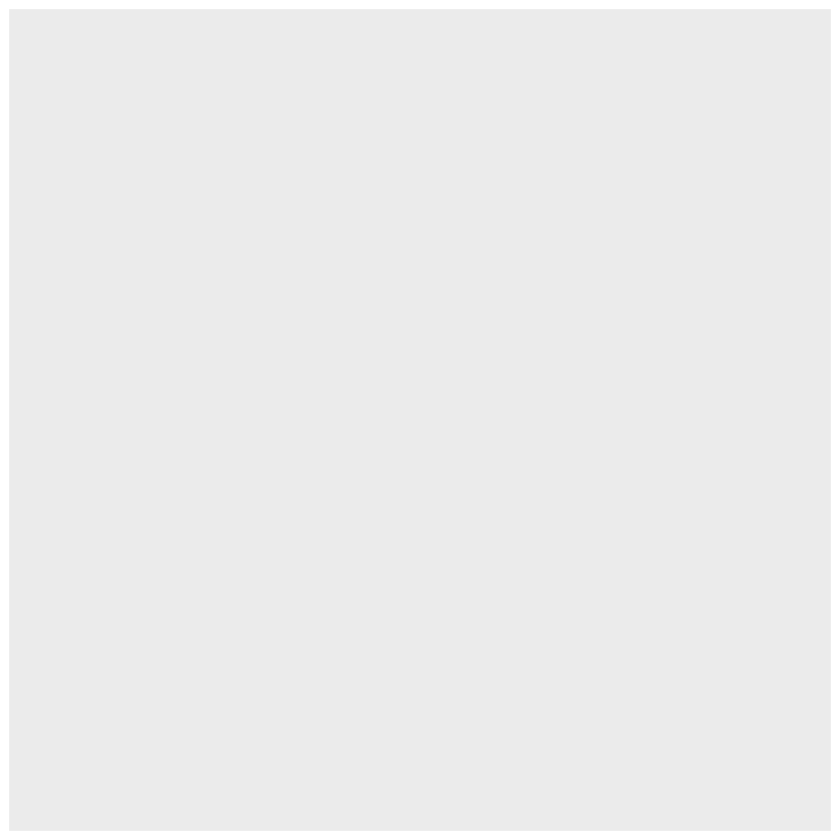

In [5]:
ice_df |> ggplot()

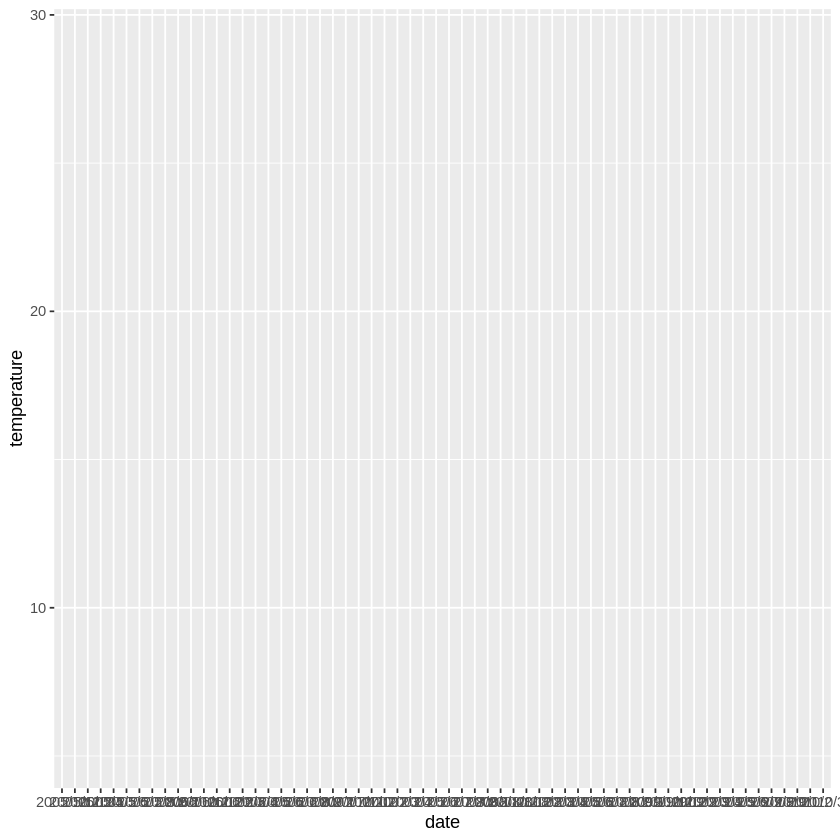

In [6]:
ice_df |> ggplot() + aes(x=date, y=temperature)

https://i-doctor.sakura.ne.jp/font/?p=44373

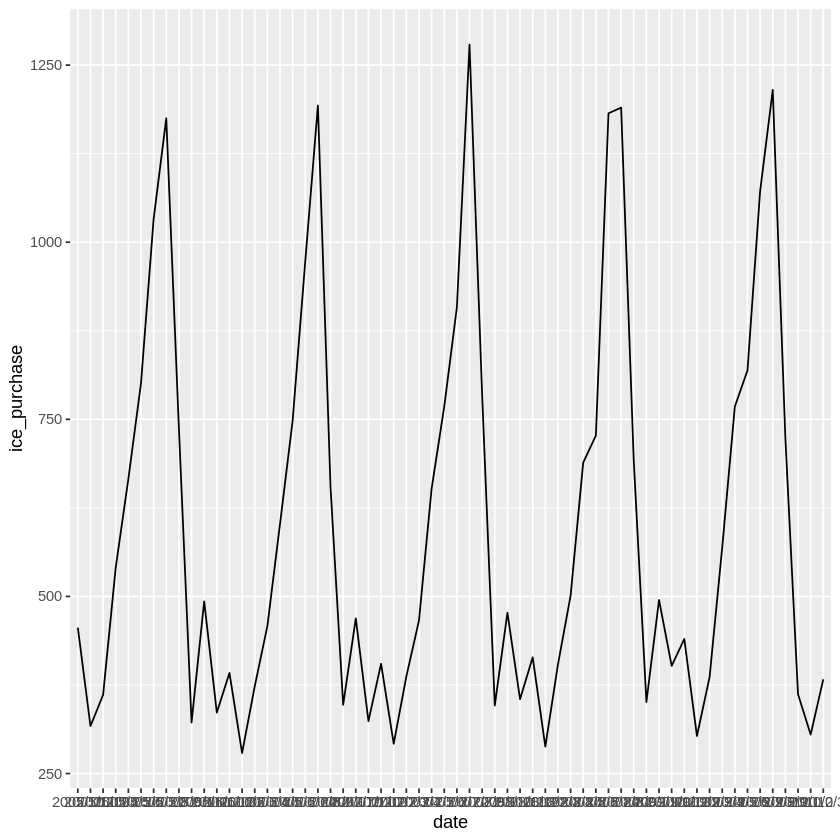

In [24]:
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) + geom_line() 

x軸のラベルを90度回転して読みやすくる。

https://qiita.com/hoxo_m/items/1a0b71b5868686311747

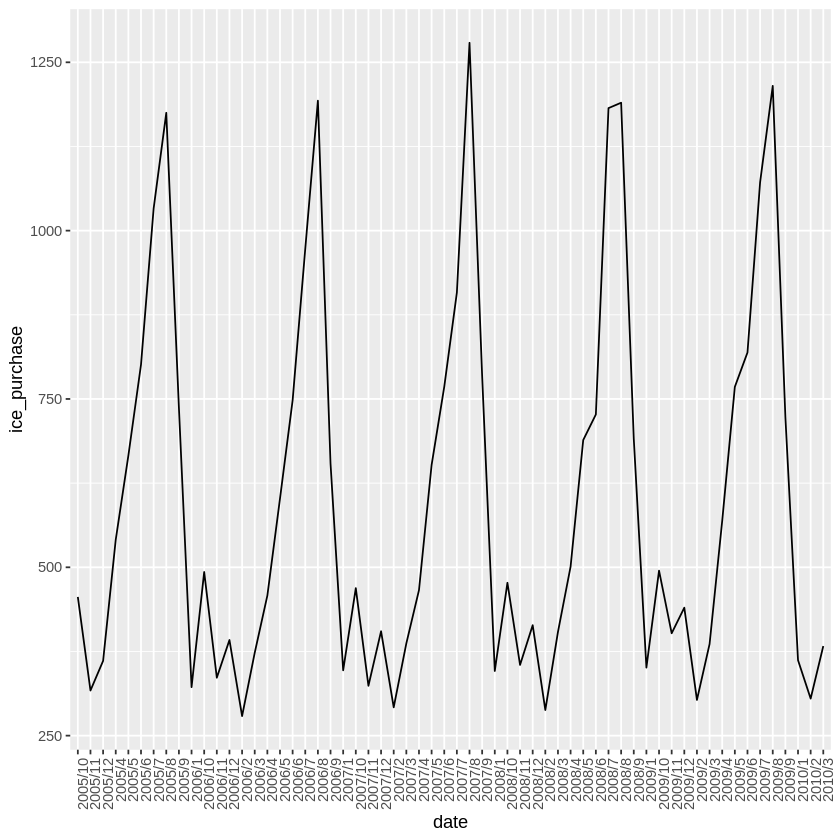

In [23]:
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) + geom_line() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

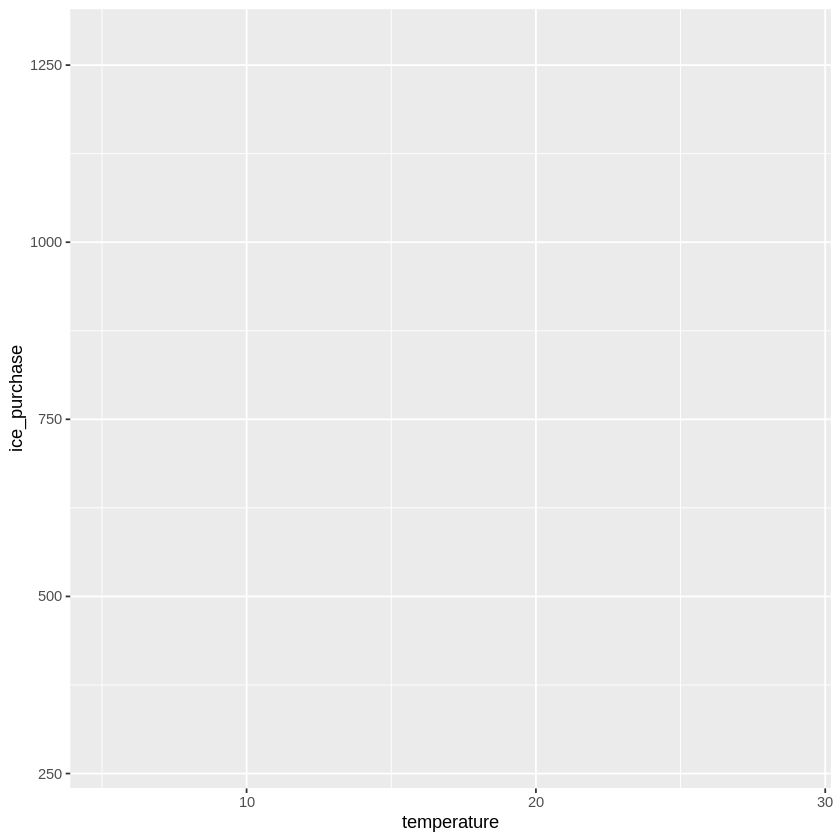

In [9]:
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase, group=1) 

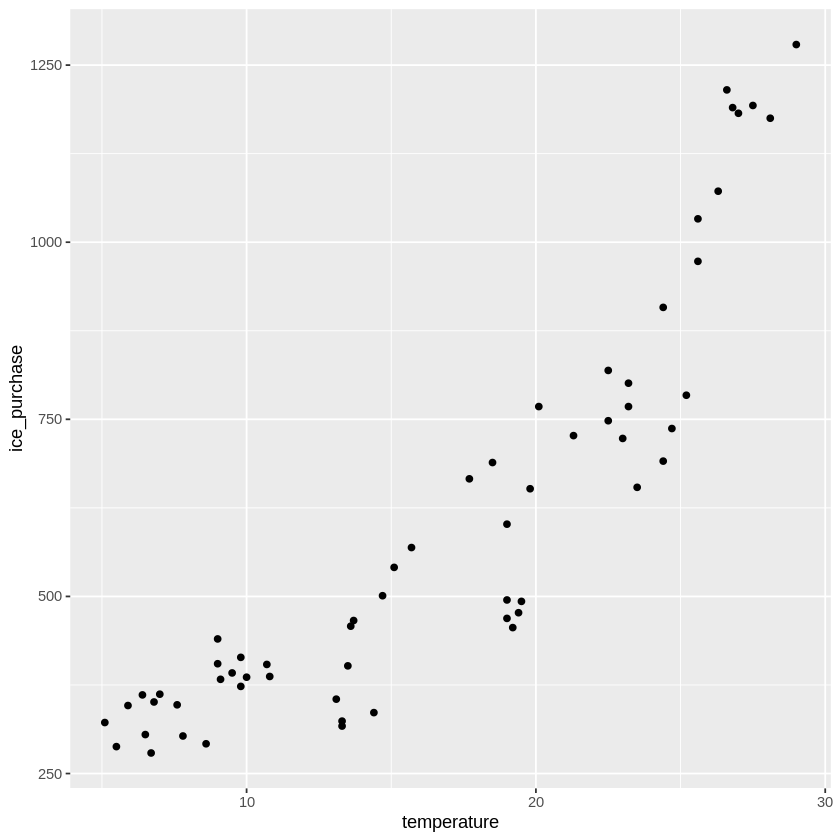

In [11]:
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase) + geom_point()

**グラフをきれいに並べる**

In [13]:
install.packages("patchwork")
require(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
ice_df |> ggplot() + aes(x=date, y=temperature, group=1) + geom_line() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p1
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) + geom_line() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p2
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase, group=1) + geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p3

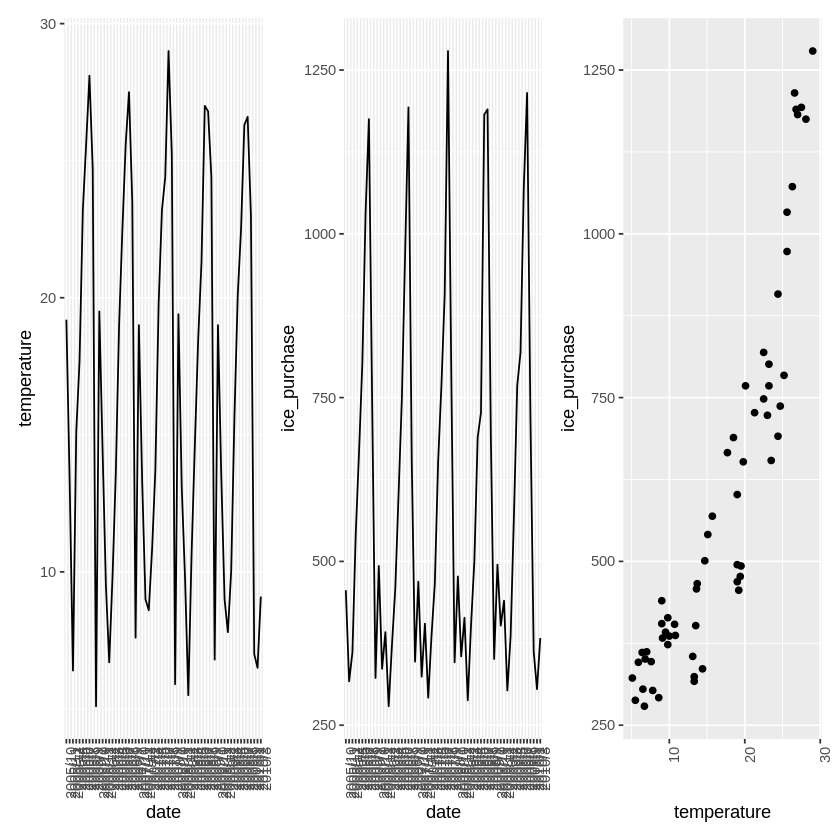

In [26]:
p1 + p2 + p3

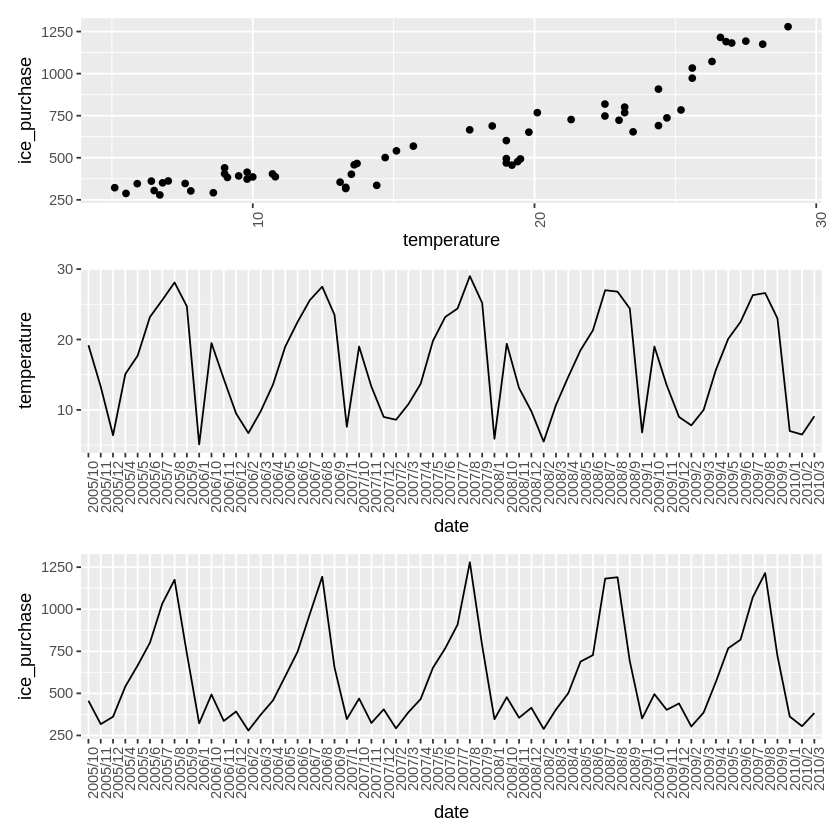

In [27]:
p3 / p1 / p2  

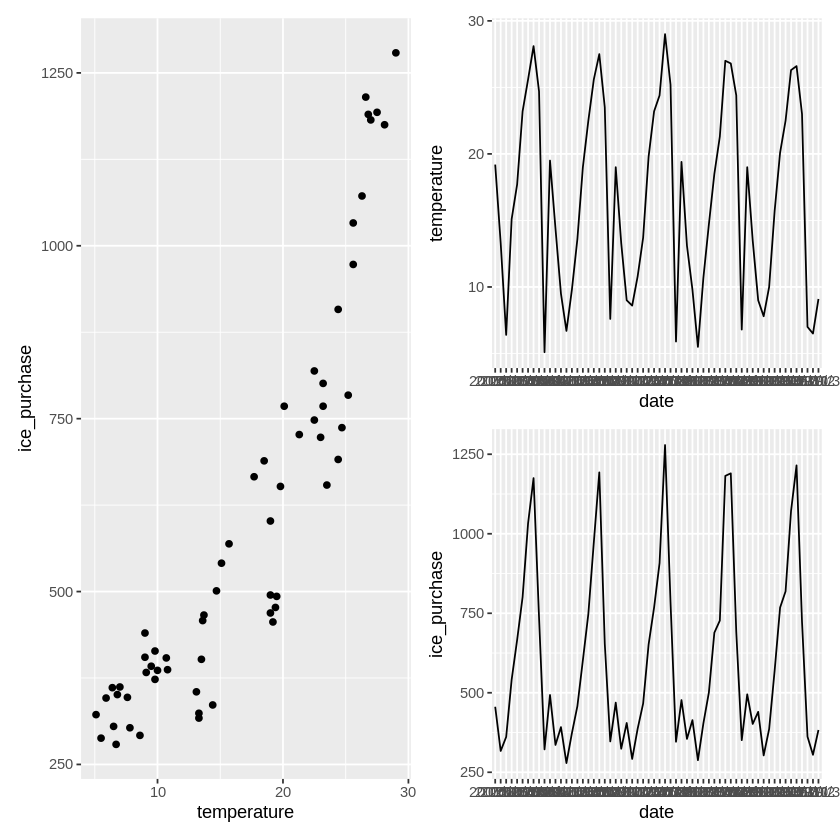

In [17]:
p3 + p1 / p2  

**ggthemesを使ってグラフのデザインを変える**

ggthemesはウォール・ストリート・ジャーナル（WSJ）風のグラフなどちょっと凝ったデザインのグラフを作ってくれるパッケージである。

https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/

In [18]:
install.packages("ggthemes")
require(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggthemes



In [28]:
ice_df |> ggplot() + aes(x=date, y=temperature, group=1) + geom_line() + theme_wsj() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p1
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) + geom_line() + theme_wsj() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p2
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase, group=1) + geom_point() + theme_wsj() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p3

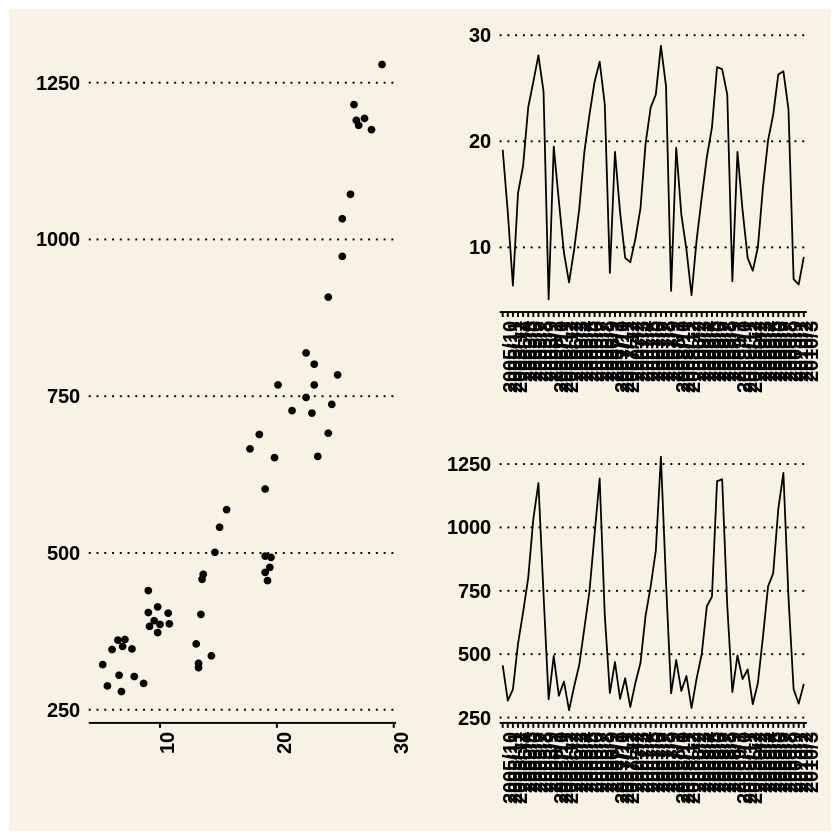

In [29]:
p3 + p1 / p2  

**手間を掛けずにキレイなグラフを**

ggplot2やその拡張パッケージを使って、手間を掛けずにキレイなグラフを作りましょう。